<a href="https://colab.research.google.com/github/lnviktorii/DATA201_Group6_Project1/blob/main/1_Project1_201OCT30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Exploratory Data Analysis of Data Science Salaries (2020–2025)**

Viktoriia Lyon,
Arash Kamangir &
Jack Hegarty

Professor Abdirisak Mohamed   
Data 201   
November 6, 2025


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Data Description: AI, ML, and Data Science Salaries (2020–2025)

Dataset title: AI, ML & Data Science Salaries 2020–2025
Source: Kaggle (uploaded by Samith Sachidanandan, 2024 update)
License: Publicly available for educational and research use.
File loaded via: kagglehub → CSV from the public Kaggle dataset.

Overview

This dataset contains self-reported and web-collected salary information for professionals in data-related roles — such as Data Scientist, Machine Learning Engineer, Data Analyst, and AI Specialist — between 2020 and 2025.

It includes 88,584 rows and 11 columns, providing variables on job title, experience level, salary (converted to USD), employment type, and company characteristics.
While it’s labeled “global,” our analysis confirmed that about 90 % of all records are from the United States, which is why most visualizations focus on the U.S. market.

 Main columns
Column	Description
work_year	Year when the salary was paid (2020–2025).
experience_level	EN (Entry/Junior), MI (Mid/Intermediate), SE (Senior/Expert), EX (Executive/Director).
employment_type	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance).
job_title	Role name (e.g., Data Scientist, ML Engineer).
salary	Annual salary in original currency.
salary_currency	ISO code of the reported currency.
salary_in_usd	Converted salary in USD (based on yearly average FX rate).
employee_residence	Country of the employee.
remote_ratio	Remote work share: 0 = on-site, 50 = hybrid, 100 = fully remote.
company_location	Employer’s headquarter country.
company_size	Company size: S (<50), M (51–250), L (>250).

 Limitations and data reliability

This is not an official government or corporate HR dataset. It combines community submissions, public web scraping, and aggregated survey data.

Currency conversion uses average yearly rates — short-term fluctuations and bonuses are not captured.

Job titles are not standardized, and roles may overlap (for example, “Data Engineer” vs “ML Engineer”).

Geographic balance is poor: the dataset is U.S.-heavy, and smaller countries have very few entries.

Use this dataset only for learning and exploratory analysis, not for precise market benchmarking.

Why we selected this dataset

We wanted to explore:

What salary levels new graduates from a 2-year college program (entry level) can realistically expect in the data field.

How salaries increase with experience, from entry to executive positions.

Differences between the U.S. and the rest of the world.

Year-to-year trends (2020–2025) and statistical uncertainty (bootstrapped confidence intervals).

The dataset’s size and structure make it ideal for practicing:

Exploratory Data Analysis (EDA)

Visualization (distributions, boxplots, geoplots)

Sampling and bootstrapping

Regression and trend analysis

In [ ]:
# === Reproducible data fetch (works from GitHub/Colab) ===
# This cell downloads the dataset each time the notebook runs.
# It avoids committing large CSVs or secrets to GitHub.

!pip -q install kagglehub

import kagglehub, os, glob, pandas as pd

DATASET_SLUG = "samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025"

# Download (or reuse cache) and find the CSV
data_dir = kagglehub.dataset_download(DATASET_SLUG)
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
assert csv_files, f"No CSV files found in: {data_dir}"

csv_path = csv_files[0]
df = pd.read_csv(csv_path)

print("Loaded:", os.path.basename(csv_path), "-> shape:", df.shape)
df.head(2)


Using Colab cache for faster access to the 'the-global-ai-ml-data-science-salary-for-2025' dataset.
Loaded: salaries.csv -> shape: (88584, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M


In [ ]:
df['salary_in_usd'].median()

146307.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [ ]:
df.shape

(88584, 11)

In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
print(df.duplicated().sum())

44340


This KDE plot shows the distribution of salaries in USD, highlighting the most common salary ranges. The curve is right-skewed, indicating most salaries fall in lower-to-mid ranges while fewer employees earn very high salaries.


This bar chart shows the distribution of experience levels in the dataset. Most employees fall into senior and mid-level roles, with fewer junior and executive-level positions represented.

In [ ]:
# USA subset (company headquarter location)
usa = df[df['company_location'] == 'US'].copy()
usa.shape, usa['salary_in_usd'].describe()[['count','min','50%','mean','max']]


((79762, 11),
 count     79762.000000
 min       16000.000000
 50%      151500.000000
 mean     163539.335949
 max      750000.000000
 Name: salary_in_usd, dtype: float64)

/tmp/ipython-input-4015707407.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = ax.legend(title="Region", frameon=True)


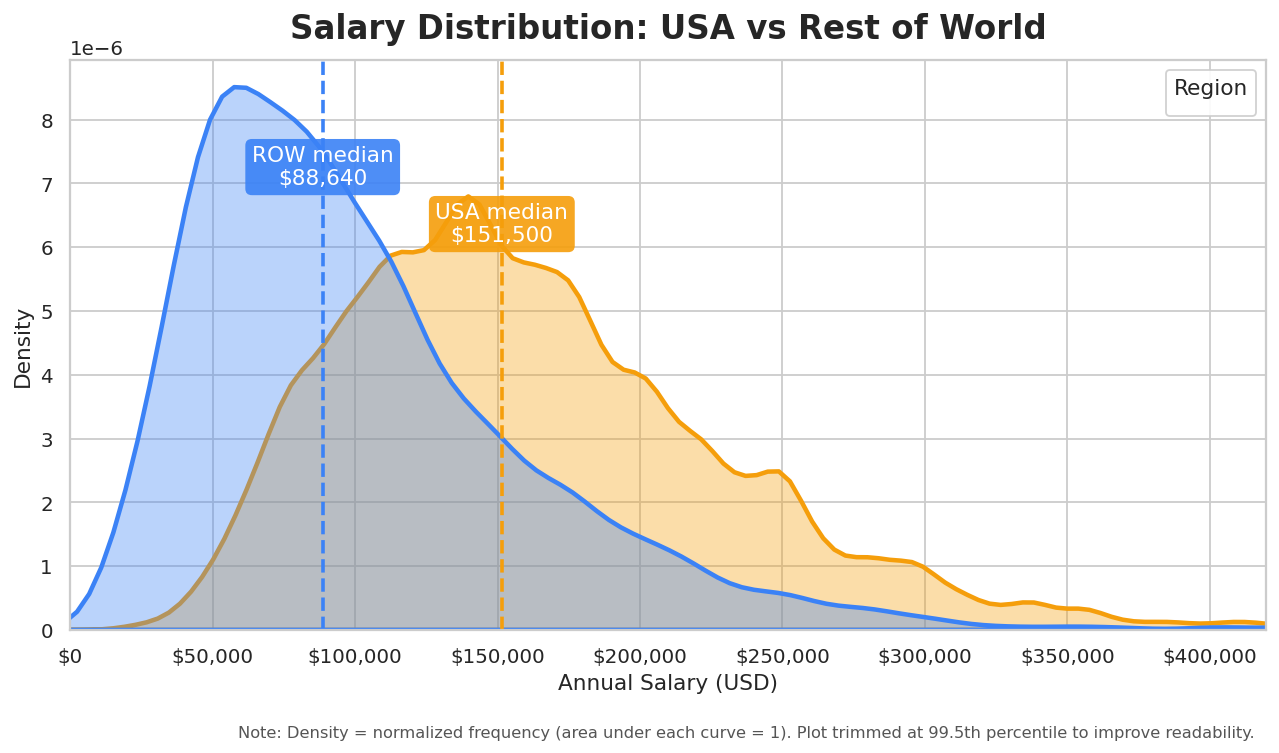

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data (same split)
df_cmp = df.assign(region=np.where(df['company_location']=='US','USA','Rest of World'))

# Medians
med_row = df_cmp.loc[df_cmp['region']=='Rest of World','salary_in_usd'].median()
med_usa = df_cmp.loc[df_cmp['region']=='USA','salary_in_usd'].median()

# Nice theme + palette
sns.set_theme(style="whitegrid")
palette = {'Rest of World':'#3B82F6',   # blue-500
           'USA':'#F59E0B'}            # amber-500

# Smart x-limit (trim extreme outliers for readability)
xmax = np.percentile(df_cmp['salary_in_usd'], 99.5)
xmin = 0

fig, ax = plt.subplots(figsize=(10,6), dpi=130)

# KDEs
sns.kdeplot(
    data=df_cmp, x='salary_in_usd', hue='region',
    fill=True, common_norm=False, alpha=0.35, linewidth=2.5,
    palette=palette, bw_adjust=0.9, ax=ax
)

# Median lines
ax.axvline(med_row, color=palette['Rest of World'], linestyle='--', linewidth=2)
ax.axvline(med_usa, color=palette['USA'], linestyle='--', linewidth=2)

# Median labels (pretty currency + rounded boxes)
y_hi = ax.get_ylim()[1]
ax.text(med_row, y_hi*0.85, f"ROW median\n${med_row:,.0f}",
        color='white', ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.3', fc=palette['Rest of World'], ec='none', alpha=0.9))
ax.text(med_usa, y_hi*0.75, f"USA median\n${med_usa:,.0f}",
        color='white', ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.3', fc=palette['USA'], ec='none', alpha=0.9))

# Axes cosmetics
ax.set_xlim(xmin, xmax)
ax.set_title("Salary Distribution: USA vs Rest of World", fontsize=18, weight='bold', pad=12)
ax.set_xlabel("Annual Salary (USD)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)

# Currency tick formatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Legend cleanup
leg = ax.legend(title="Region", frameon=True)
leg.get_frame().set_alpha(0.9)

# Helpful footnote
ax.text(0.99, -0.18,
        "Note: Density = normalized frequency (area under each curve = 1). "
        "Plot trimmed at 99.5th percentile to improve readability.",
        transform=ax.transAxes, ha='right', va='center', fontsize=9, color='#555')

plt.tight_layout()
plt.show()


Here we compare the salary distribution of U.S.-based companies to the rest of the world. The orange curve represents salaries in the U.S., while the blue curve represents all other countries. Even though the data is normalized to USD, it’s not a perfectly fair comparison because cost of living, job titles, and company types differ significantly across regions.

In [ ]:
!pip -q install pycountry plotly


In [ ]:
# === Choropleth: records by company HQ country (robust) ===
import plotly.express as px
import pycountry
import pandas as pd

def to_iso3(alpha2):
    try:
        return pycountry.countries.get(alpha_2=str(alpha2)).alpha_3
    except Exception:
        return None

# Count rows per country (ISO-2 in dataset), make column names consistent
cc = df['company_location'].value_counts().reset_index(name='count')
# After reset_index, the country column might be called 'index' or 'company_location'
if 'company_location' in cc.columns and 'count' in cc.columns and len(cc.columns) == 2:
    cc = cc.rename(columns={'company_location': 'country'})
elif 'index' in cc.columns:
    cc = cc.rename(columns={'index': 'country'})

# Convert ISO-2 -> ISO-3 for Plotly
cc['iso3'] = cc['country'].apply(to_iso3)

# Quick sanity check
display(cc.head())

# Plot (drop rows we couldn't map)
fig = px.choropleth(
    cc.dropna(subset=['iso3']),
    locations='iso3',
    color='count',
    color_continuous_scale='Blues',
    title='Distribution of Data Science Salary Records by Country'
)
fig.show()


,country,count,iso3
0,US,79762,USA
1,CA,3204,CAN
2,GB,2584,GBR
3,AU,303,AUS
4,DE,272,DEU


/tmp/ipython-input-1549833832.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




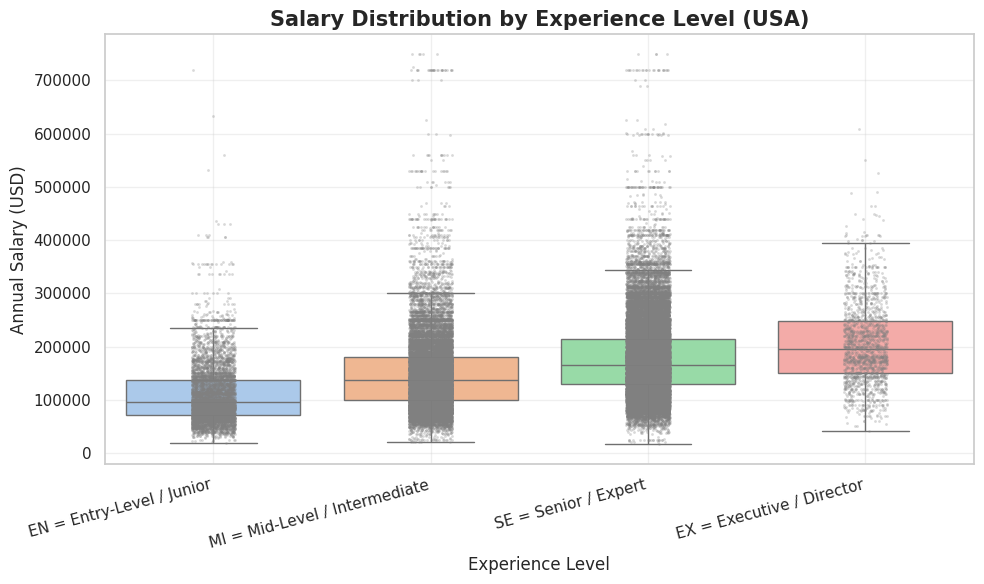

In [ ]:
# Reorder levels and clarify labels
order = ['EN', 'MI', 'SE', 'EX']
labels = [
    'EN = Entry-Level / Junior',
    'MI = Mid-Level / Intermediate',
    'SE = Senior / Expert',
    'EX = Executive / Director'
]

plt.figure(figsize=(10,6))
sns.boxplot(data=usa, x='experience_level', y='salary_in_usd',
            order=order, palette='pastel', showfliers=False)
sns.stripplot(data=usa, x='experience_level', y='salary_in_usd',
              order=order, color='gray', size=2, alpha=0.3)

plt.title('Salary Distribution by Experience Level (USA)', fontsize=15, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Annual Salary (USD)', fontsize=12)
plt.xticks(range(len(order)), labels, rotation=15, ha='right')  # ✅ fixed line
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


This boxplot compares salaries for different experience levels in the U.S. dataset. We can see a clear upward trend — as experience increases, so does pay. Entry-level positions (EN) have the lowest median around  85–90K,whilesenior(SE)andexecutive(EX)levelsreachabove 200K. The spread also widens at higher levels, showing that senior and executive roles vary more — some earn double the median depending on company and job title.


[ ]


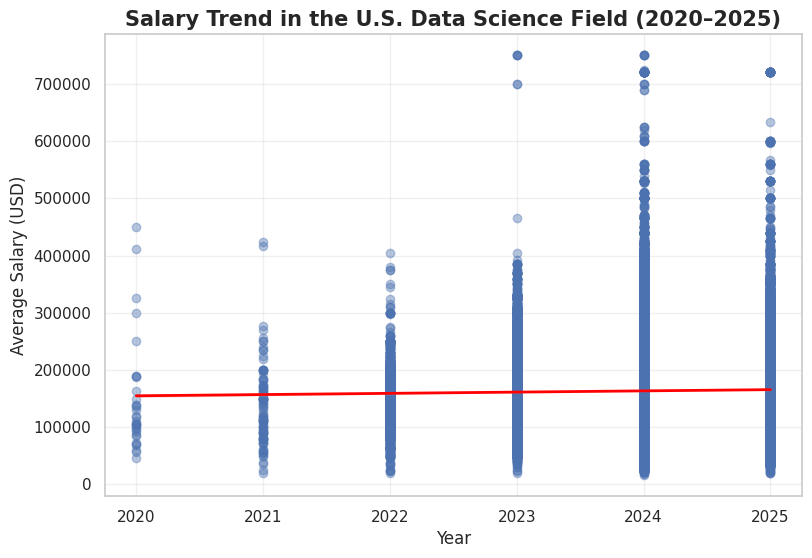

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.regplot(data=usa, x='work_year', y='salary_in_usd', scatter_kws={'alpha':0.4}, line_kws={'color':'red', 'linewidth':2})
plt.title('Salary Trend in the U.S. Data Science Field (2020–2025)', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(alpha=0.3)
plt.show()


95% Confidence Interval: ($X, $Y) — this interval represents the range in which the true median tech salary is likely to fall with 95% confidence.

The lower bound ($X) means there is a 2.5% chance the true median salary is below this value.
The upper bound ($Y) means there is a 2.5% chance the true median salary is above this value.

This range suggests that, based on our bootstrap sample, we can be 95% confident that the true median salary for tech professionals lies within this interval.

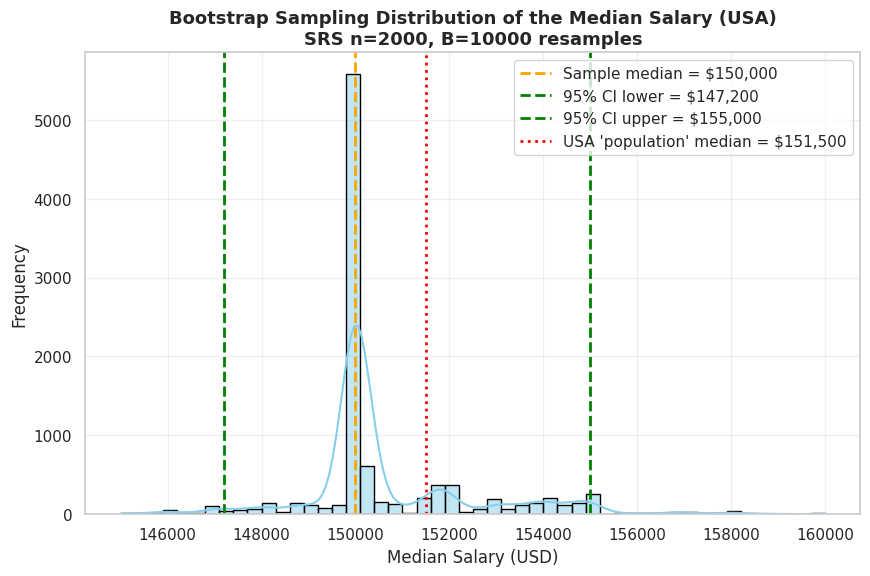

Population (USA) median: $151,500
Sample size (n): 2000
Sample median (point estimate): $150,000
Bootstrap 95% CI for the median: [$147,200, $155,000]


In [ ]:
# --- 0) Setup (uses your existing 'df' and 'usa' if present) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If 'usa' doesn't exist yet, build it (USA only, drop NaNs)
try:
    usa
except NameError:
    usa = df[df['company_location'] == 'US'].copy()

usa = usa.dropna(subset=['salary_in_usd'])

# --- 1) SIMPLE RANDOM SAMPLE (the “sampling” your prof asked for) ---
rng = np.random.default_rng(42)          # reproducible
N = len(usa)                              # population size (USA rows)
n = 2000                                  # sample size (choose 1000–5000; justify in text)
sample_idx = rng.choice(N, size=n, replace=False)  # SRS w/out replacement
sample = usa.iloc[sample_idx].copy()

# --- 2) BOOTSTRAP THE SAMPLE (sampling distribution of the median) ---
x = sample['salary_in_usd'].to_numpy()
B = 10_000                                # number of bootstrap resamples
idx = rng.integers(0, n, size=(B, n))     # indices with replacement
boot_medians = np.median(x[idx], axis=1)

median_hat   = np.median(x)                               # sample median
ci_lower, ci_upper = np.percentile(boot_medians, [2.5, 97.5])

# For context: "population" (USA) median using all USA rows
pop_median = usa['salary_in_usd'].median()

# --- 3) PLOT: bootstrap sampling distribution + CI lines ---
plt.figure(figsize=(10, 6))
sns.histplot(boot_medians, bins=50, kde=True, color='skyblue', edgecolor='black')

plt.axvline(median_hat,  color='orange', linestyle='--', linewidth=2,
            label=f"Sample median = ${median_hat:,.0f}")
plt.axvline(ci_lower,    color='green',  linestyle='--', linewidth=2,
            label=f"95% CI lower = ${ci_lower:,.0f}")
plt.axvline(ci_upper,    color='green',  linestyle='--', linewidth=2,
            label=f"95% CI upper = ${ci_upper:,.0f}")
plt.axvline(pop_median,  color='red',    linestyle=':',  linewidth=2,
            label=f"USA 'population' median = ${pop_median:,.0f}")

plt.title('Bootstrap Sampling Distribution of the Median Salary (USA)\n'
          f'SRS n={n}, B={B} resamples', fontsize=13, fontweight='bold')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 4) Quick text summary you can paste under the plot ---
print(
    f"Population (USA) median: ${pop_median:,.0f}\n"
    f"Sample size (n): {n}\n"
    f"Sample median (point estimate): ${median_hat:,.0f}\n"
    f"Bootstrap 95% CI for the median: [${ci_lower:,.0f}, ${ci_upper:,.0f}]"
)


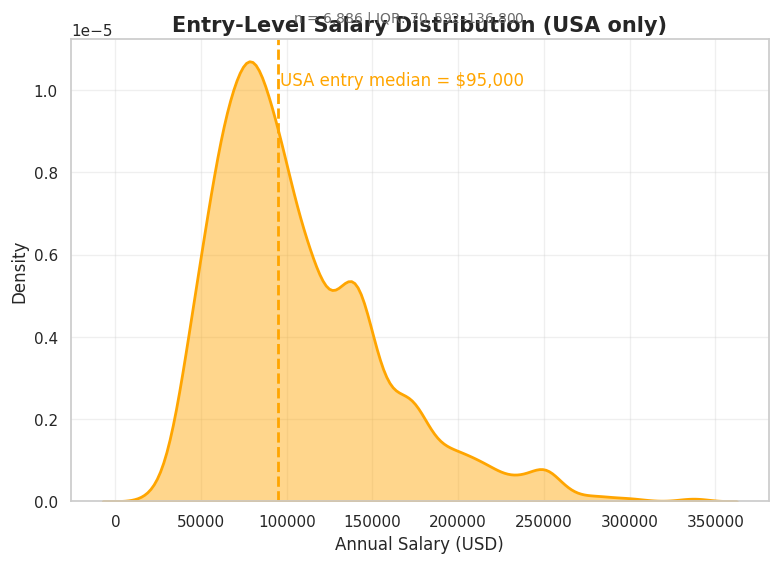

In [ ]:
# Entry-level USA only
entry_usa = df[(df['experience_level'] == 'EN') & (df['company_location'] == 'US')].copy()

# Trim extreme values for readability (keep up to 99.5th percentile just for plotting)
cap = entry_usa['salary_in_usd'].quantile(0.995)
entry_plot = entry_usa[entry_usa['salary_in_usd'] <= cap]

# Summary stats
med = entry_usa['salary_in_usd'].median()
p25 = entry_usa['salary_in_usd'].quantile(0.25)
p75 = entry_usa['salary_in_usd'].quantile(0.75)
n   = len(entry_usa)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
sns.kdeplot(entry_plot['salary_in_usd'], fill=True, alpha=0.45, linewidth=2, color='orange')
plt.axvline(med, color='orange', linestyle='--', linewidth=2)

# Nice label at the median
y_top = plt.ylim()[1]*0.9
plt.text(med+1000, y_top, f'USA entry median = ${med:,.0f}', color='orange', fontsize=12)

plt.title('Entry-Level Salary Distribution (USA only)', fontsize=15, fontweight='bold')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# Optional subtitle with sample size & IQR
plt.suptitle(f'n = {n:,} | IQR: ${p25:,.0f} – ${p75:,.0f}', y=0.93, fontsize=10, color='dimgray')

plt.show()
